In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [3]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Exploratory data analysis

In [6]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<AxesSubplot:>

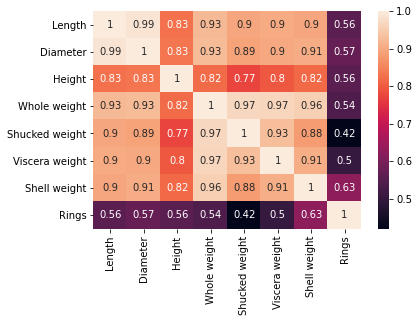

In [9]:
# check correaltion
import seaborn as sns
corr=data.corr()
sns.heatmap(corr, annot=True)

In [10]:
# this shows that diameter is highly correalted with lenght also stucked weight is highly correalted with whole weight

Now check the relation b/w feature and label

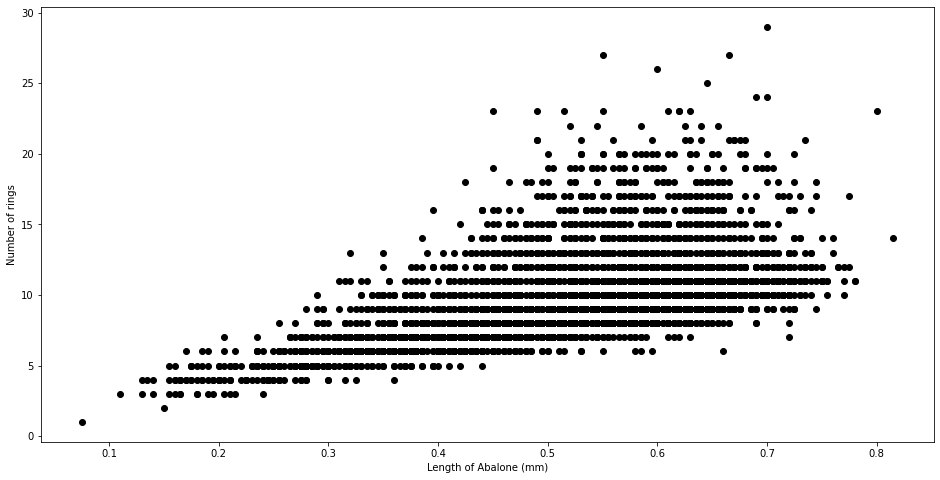

In [12]:
plt.figure(figsize=(16,8))
plt.scatter(data['Length'],data['Rings'], c='black')
plt.xlabel('Length of Abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

In [13]:
#this shows with increase in lenght of Abalone number of rings will increases

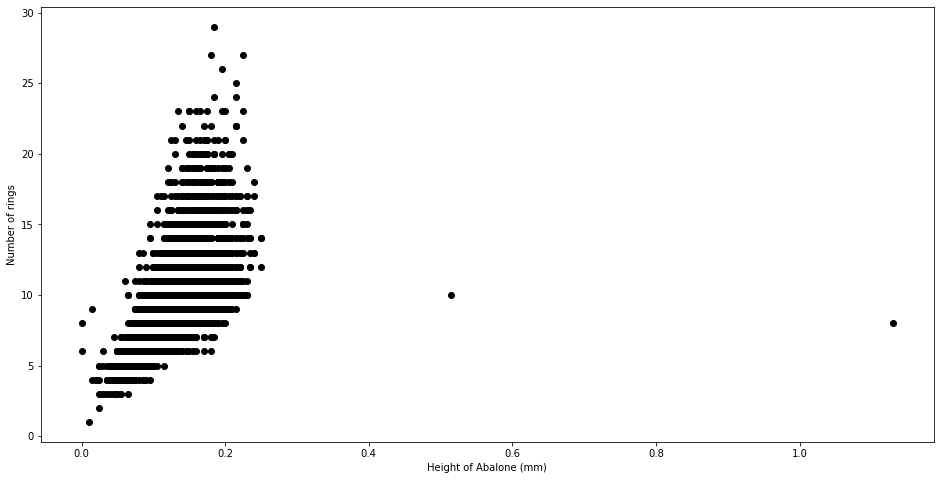

In [14]:
plt.figure(figsize=(16,8))
plt.scatter(data['Height'],data['Rings'], c='black')
plt.xlabel('Height of Abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

In [15]:
# there are 2 outliers in this dataset

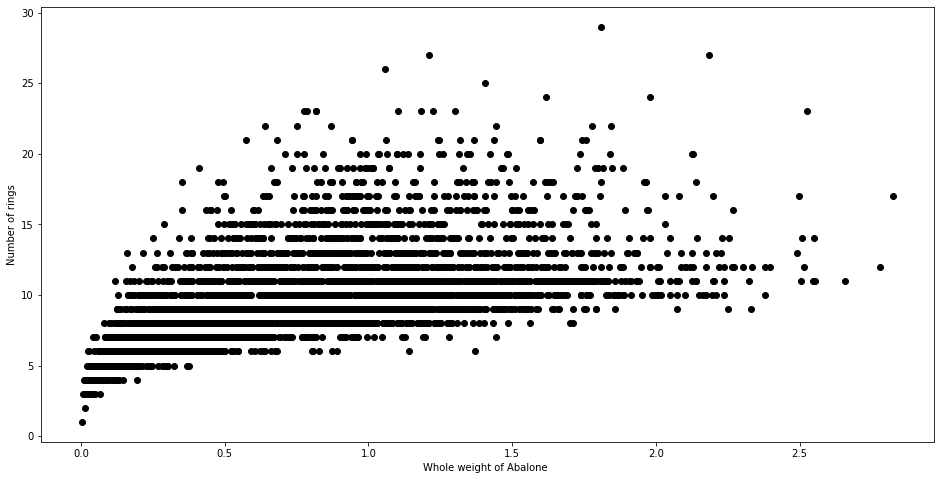

In [16]:
plt.figure(figsize=(16,8))
plt.scatter(data['Whole weight'],data['Rings'], c='black')
plt.xlabel('Whole weight of Abalone ')
plt.ylabel('Number of rings')
plt.show()

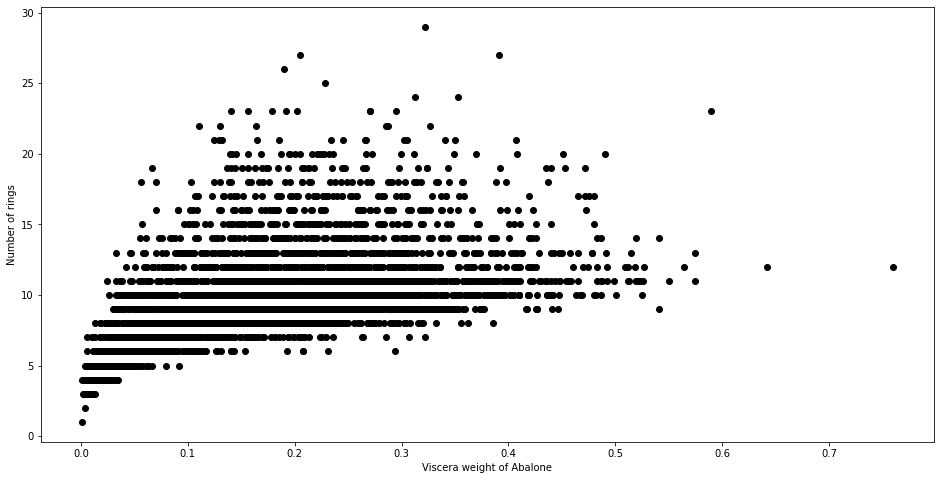

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(data['Viscera weight'],data['Rings'], c='black')
plt.xlabel('Viscera weight of Abalone')
plt.ylabel('Number of rings')
plt.show()

lets plot b/e 2 feature length and height

In [19]:
from mpl_toolkits.mplot3d import Axes3D

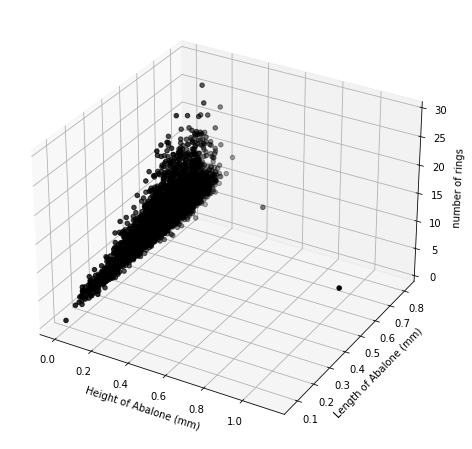

In [20]:
fig= plt.figure(figsize=(16,8))
ax= plt.axes(projection='3d')
ax.set_xlabel('Height of Abalone (mm)')
ax.set_ylabel('Length of Abalone (mm)')
ax.set_zlabel('number of rings')
ax.scatter(data['Height'], data['Length'], data['Rings'], c='black')

In [21]:
# with this we see with increase in length and height abalone tends to be older also there are 2 outliers

In [23]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [26]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [27]:
# as we see there is one column which is having object type dataset so we need to change this by using LabelEncoder

In [28]:
encoded_data= pd.get_dummies(data)
encoded_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


In [29]:
encoded_data.shape

(4177, 11)

In [30]:
#As we see previously we are having 9 column now it is 11 

Modelling

In [31]:
#split dataset
training_set= encoded_data.iloc[:4099, :]
validation_set= encoded_data.iloc[4099:, :]
print(training_set.shape)
print(validation_set.shape)

(4099, 11)
(78, 11)


#### Baseline Model (Multiple Linear Regression)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [34]:
x= training_set[['Length','Height']]
y= training_set['Rings'].values.reshape(-1,1)

x_val= validation_set[['Length','Height']]
y_val= validation_set['Rings'].values.reshape(-1,1)

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1,random_state=42)

In [35]:
lin_reg = LinearRegression()

lin_reg.fit(x_train,y_train)

#test RMSE
lin_reg_pred = lin_reg.predict(x_test)
test_rmse = mean_squared_error(y_test, lin_reg_pred, squared= False)
print(f'Test RMSE: {test_rmse}')


#validation RMSE
lin_reg_pred_val = lin_reg.predict(x_val)
val_rmse = mean_squared_error(y_val, lin_reg_pred_val, squared= False)
print(f'validation RMSE: {val_rmse}')

Test RMSE: 2.5679099174951547
validation RMSE: 1.5661783782311613


## Model with Regularization

In [44]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [40]:
ridge= Ridge()
parameters = {'alpha': [-15, -10, -8, -4, -3, -2, 1, 5, 10, 20]}

ridge_regressor =GridSearchCV(ridge, parameters, scoring='neg_root_mean_squared_error', cv=5)
ridge_regressor.fit(x_train, y_train)

print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 1}
2.656456365844888


In [42]:
ridge_reg= Ridge(alpha=1)
ridge_reg.fit(x_train, y_train)
ridge_reg_pred = ridge_reg.predict(x_test)

# test RMSE
test_rmse = mean_squared_error(y_test, ridge_reg_pred, squared= False)
print(f'Test RMSE: {test_rmse}')


#validation RMSE
ridge_reg_pred_val = ridge_reg.predict(x_val)
val_rmse = mean_squared_error(y_val, ridge_reg_pred_val, squared= False)
print(f'validation RMSE: {val_rmse}')

Test RMSE: 2.5871300097108305
validation RMSE: 1.5640813253014878


In [45]:
lasso= Lasso(tol=0.05)
parameters = {'alpha': [-15, -10, -8, -4, -3, -2, 1, 5, 10, 20]}

lasso_regressor =GridSearchCV(lasso, parameters, scoring='neg_root_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 1}
3.242740213798146


In [47]:
lasso_reg= Lasso(alpha=1)
lasso_reg.fit(x_train, y_train)
lasso_reg_pred = lasso_reg.predict(x_test)

# test RMSE
test_rmse = mean_squared_error(y_test, lasso_reg_pred, squared= False)
print(f'Test RMSE: {test_rmse}')


#validation RMSE
lasso_reg_pred_val = lasso_reg.predict(x_val)
val_rmse = mean_squared_error(y_val, lasso_reg_pred_val, squared= False)
print(f'validation RMSE: {val_rmse}')

Test RMSE: 3.2315518915511485
validation RMSE: 1.8892343923959762


### Tree Based Model

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [51]:
x= training_set.drop(['Diameter','Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],axis=1)
y= training_set['Rings'].values.reshape(-1,1)

x_val= validation_set.drop(['Diameter','Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],axis=1)
y_val= validation_set['Rings'].values.reshape(-1,1)

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1,random_state=42)

In [53]:
rf= RandomForestRegressor()
parameters = {'n_estimators':[int(x) for x in np.linspace(100,1000,10)]}
rf_regressor= GridSearchCV(rf, parameters, scoring='neg_mean_squared_error')
rf_regressor.fit(x_train, y_train.ravel())
print(rf_regressor.best_params_)
print(-rf_regressor.best_score_)

{'n_estimators': 400}
8.392205631628066


In [55]:
rf_reg= RandomForestRegressor(n_estimators=400)
rf_reg.fit(x_train, y_train.ravel())
rf_reg_pred = rf_reg.predict(x_test)

# test RMSE
test_rmse = mean_squared_error(y_test, rf_reg_pred, squared= False)
print(f'Test RMSE: {test_rmse}')


#validation RMSE
rf_reg_pred_val = rf_reg.predict(x_val)
val_rmse = mean_squared_error(y_val, rf_reg_pred_val, squared= False)
print(f'validation RMSE: {val_rmse}')

Test RMSE: 2.6364460656502953
validation RMSE: 2.2407752883529457


## Bagging

In [56]:
bg= BaggingRegressor()
parameters = {'n_estimators':[int(x) for x in np.linspace(10,1000,10)],
             'max_samples':[float(x) for x in np.arange(0.1, 1.1, 0.1)]}
bg_regressor= GridSearchCV(bg, parameters, scoring='neg_mean_squared_error')
bg_regressor.fit(x_train, y_train.ravel())
print(bg_regressor.best_params_)
print(-bg_regressor.best_score_)

{'max_samples': 0.1, 'n_estimators': 780}
6.580165498668416


In [57]:
bg_reg= BaggingRegressor(n_estimators=780,max_samples=0.1)
bg_reg.fit(x_train, y_train.ravel())
bg_reg_pred = bg_reg.predict(x_test)

# test RMSE
test_rmse = mean_squared_error(y_test, bg_reg_pred, squared= False)
print(f'Test RMSE: {test_rmse}')


#validation RMSE
bg_reg_pred_val = bg_reg.predict(x_val)
val_rmse = mean_squared_error(y_val, bg_reg_pred_val, squared= False)
print(f'validation RMSE: {val_rmse}')

Test RMSE: 2.426459982459777
validation RMSE: 1.7325070752915452


### Compile Result

In [58]:
rmse_compilation= {
    'model':['linear regression', 'ridge regression','lasso','random forest','bagging'],
    'RMSE':[1.5661783782311613, 1.5640813253014878, 1.8892343923959762, 2.2407752883529457, 1.7325070752915452]
}
rmse_df=pd.DataFrame(data=rmse_compilation)
rmse_df.sort_values(by=['RMSE'], ascending=True)

,model,RMSE
1,ridge regression,1.564081
0,linear regression,1.566178
4,bagging,1.732507
2,lasso,1.889234
3,random forest,2.240775


In [59]:
# from this we can conclude ridge regression is best model

In [60]:
import pickle

In [61]:
filename= 'Abalone age prediction'
pickle.dump(ridge_reg, open(filename,'wb'))